In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Δεδομένα
stackoverflow_data = pd.read_csv('sx-stackoverflow.txt', sep="\s+", header = None, names=["source_id", "target_id", "timestamp"])

stackoverflow_data.head(5)

,source_id,target_id,timestamp
0,9,8,1217567877
1,1,1,1217573801
2,13,1,1217606247
3,17,1,1217617639
4,48,2,1217618182


In [13]:
# Create a small dataset of 100 rows first 50 and last 50
# dataset = pd.concat([stackoverflow_data.iloc[:1000], stackoverflow_data.iloc[-1000:]]) 
dataset = stackoverflow_data.iloc[:300]

In [14]:
# Υπολογισμός των χρονικών στιγμών t_min, t_max, ΔΤ, δτ
N = int(input('Enter number of time periods:')) # User Input

t_min = dataset.timestamp.min()
t_max = dataset.timestamp.max()

DT = t_max - t_min
dt = DT / N

periodLength = int(len(dataset)/N)

print('Minimum Timestamp = ', t_min, 'Date: ', pd.to_datetime(t_min, unit='s'))
print('Maximum Timestamp = ', t_max, 'Date: ', pd.to_datetime(t_max, unit='s'))
print('DT = ', DT)
print('χρονική διάρκεια: ', dt)


Enter number of time periods:5
Minimum Timestamp =  1217567877 Date:  2008-08-01 05:17:57
Maximum Timestamp =  1217863615 Date:  2008-08-04 15:26:55
DT =  295738
χρονική διάρκεια:  59147.6


In [15]:
# Διαμέριση του συνολικού χρονικού διαστήματος
def create_intervals(dataset,N):
    
    intervals = []
    for j in range(0,N):
        
        #Start of time interval
        tj = t_min + j * dt
        
        #End of time interval
        tj1 = t_min + (j+1) * dt

        intervals.append([int(tj),int(tj1)])

    return(intervals)

time_intervals = create_intervals(dataset,N)
print('Time Intervals: ', time_intervals)

Time Intervals:  [[1217567877, 1217627024], [1217627024, 1217686172], [1217686172, 1217745319], [1217745319, 1217804467], [1217804467, 1217863615]]


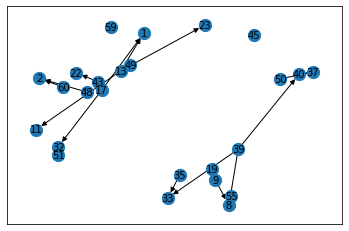

    source_id  target_id   timestamp
0           9          8  1217567877
1           1          1  1217573801
2          13          1  1217606247
3          17          1  1217617639
4          48          2  1217618182
5          17          1  1217618239
6          19          9  1217618357
7          13         23  1217618560
8          13         11  1217618799
9          23         23  1217619360
10         35         33  1217620542
11         39         33  1217620597
12         43         22  1217620971
13         17         32  1217621272
14         39         40  1217621416
15         37         40  1217621670
16         45         45  1217621917
17         17         17  1217622124
18         49         13  1217623079
19         13         23  1217623216
20         50         37  1217623475
21         40         37  1217623560
22         55          8  1217623986
23         51         32  1217624788
24         60          2  1217625055
25         39          8  1217625808
2

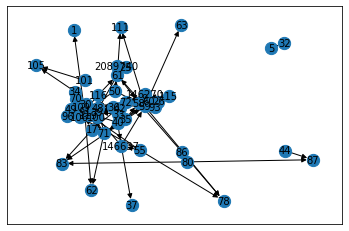

     source_id  target_id   timestamp
27          61         58  1217627137
28          25         61  1217627213
29          40         59  1217627573
30     2089740         61  1217627627
31          25         61  1217627708
..         ...        ...         ...
107        116         61  1217681517
108        116        106  1217682304
109        115          9  1217682410
110        119         91  1217682983
111        109        106  1217683413

[85 rows x 3 columns]


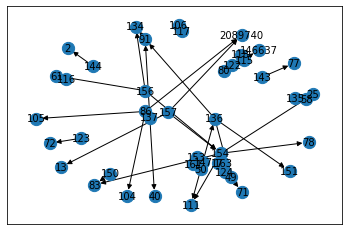

     source_id  target_id   timestamp
112         80        115  1217688487
113        117        106  1217688536
114        122        115  1217688967
115        116         61  1217689702
116        115     146637  1217689705
117        124         49  1217691124
118        122        122  1217692728
119        118        115  1217695254
120        134        134  1217695860
121         91        134  1217695956
122        136         49  1217697714
123        135         25  1217697761
124        137         91  1217700355
125        137         40  1217701497
126        123         72  1217701847
127        136         91  1217705292
128         17         49  1217709957
129        144          2  1217714233
130        147        111  1217715663
131         49         71  1217716393
132        147        136  1217718642
133         50        147  1217721413
134        143         77  1217722692
135        150         83  1217723634
136        153        147  1217724148
137        1

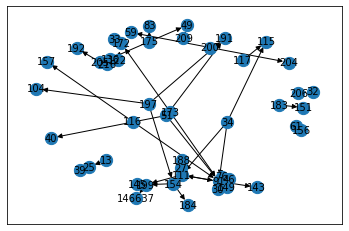

     source_id  target_id   timestamp
156         39         25  1217745430
157        149         91  1217745604
158         34         91  1217746269
159        116        157  1217747099
160        116         91  1217748123
161        111         91  1217749023
162        116        116  1217751456
163         76         91  1217752682
164        175         49  1217752796
165        175         83  1217753398
166        175        136  1217753629
167        156         61  1217755805
168         13         25  1217755970
169        173        172  1217758050
170        183        151  1217766140
171        154        184  1217768615
172        122        136  1217773734
173         33        172  1217775037
174        188        111  1217777697
175         91        143  1217788898
176        197        154  1217790558
177        197        191  1217791595
178        197        104  1217792076
179        117        115  1217792916
180        199     146637  1217793684
181         

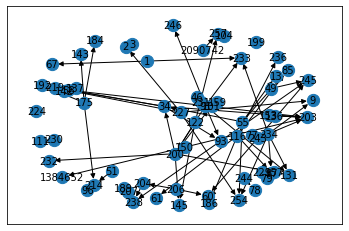

     source_id  target_id   timestamp
200        192        192  1217804757
201         58        192  1217805163
202        199        199  1217805209
203        219        192  1217805907
204        192        192  1217806282
..         ...        ...         ...
295        122        257  1217861331
296          1         67  1217862281
297        214        214  1217862896
298        116        236  1217863267
299    2090742        257  1217863615

[100 rows x 3 columns]


In [96]:
def graph(time_interval, n):
    min_time, max_time = time_interval
    g = nx.DiGraph()
    df_indexes=[]
    index=0
    while index < len(dataset):
        if min_time <= dataset.timestamp[index] < max_time \
            or ( ( max_time == N-1 and min_time <= dataset.timestamp[index] <= max_time)) \
            and dataset.source_id[index] != dataset.target_id[index]:
            g.add_edge(dataset.source_id[index], dataset.target_id[index])
            df_indexes.append(index) 
        index += 1
    nx.draw_networkx(g, node_size=150, font_size=10)
    plt.show()
    print(dataset.iloc[df_indexes])


# def graph2(time_interval, n):
#     min_time, max_time = time_interval
#     g = nx.DiGraph()
#     df_indexes=[]
#     batch=[]
#     index=0

#     if max_time == t_max:
#         while index < len(dataset) and dataset.timestamp[index] <= max_time:
#             if dataset.timestamp[index] >= min_time:
#                 df_indexes.append(index)  
#                 g.add_edge(dataset.source_id[index], dataset.target_id[index])
#             index += 1
#         batch =dataset.iloc[df_indexes]
#     else:
#         while index < len(dataset) and dataset.timestamp[index] < max_time:
#             if dataset.timestamp[index] >= min_time:
#                 df_indexes.append(index) 
#                 g.add_edge(dataset.source_id[index], dataset.target_id[index])
#             index += 1
#         batch =dataset.iloc[df_indexes]
#     nx.draw_networkx(g, node_size=150, font_size=10)
#     plt.show()
#     print('df_indexes : ',df_indexes)
    
for i in range(len(time_intervals)):
    graph(time_intervals[i], i)
#     graph2(time_intervals[i], i)

In [81]:
# # initializing a dictionary for graphs
G = {}
start=0
for x in range(1, N+1):
    stop = periodLength * x
    # Returns a graph from Pandas DataFrame containing an edge list.
    G["G{0}".format(x)] = nx.from_pandas_edgelist(dataset[start:stop], 'source_id', 'target_id', 'timestamp')
    start = stop
# print('Nodes: ',G.number_of_nodes())
# print('Edges: ',G.number_of_edges())
# E = G.edges()
# nx.draw(G)

Graph G1 Nodes:  44  Edges:  53


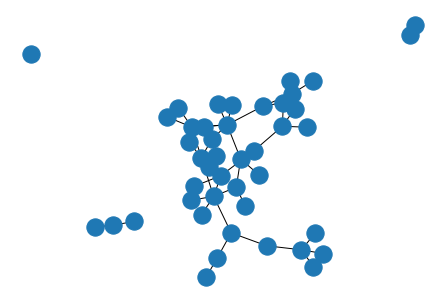

Graph G2 Nodes:  44  Edges:  56


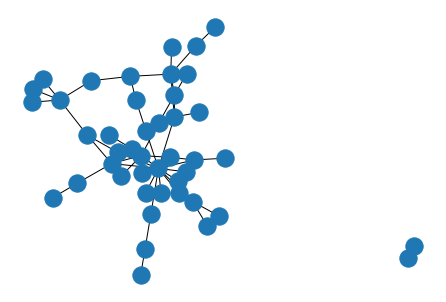

Graph G3 Nodes:  53  Edges:  58


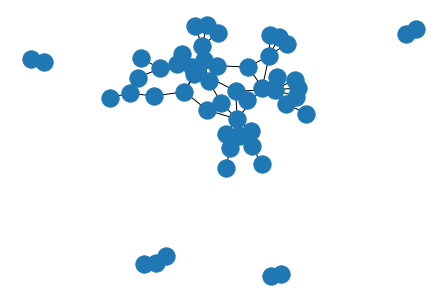

Graph G4 Nodes:  53  Edges:  58


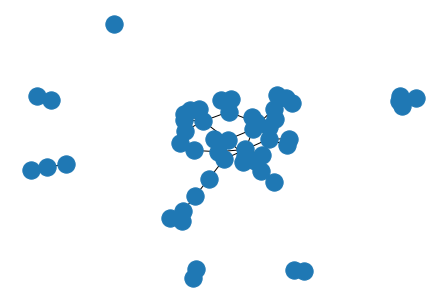

Graph G5 Nodes:  47  Edges:  55


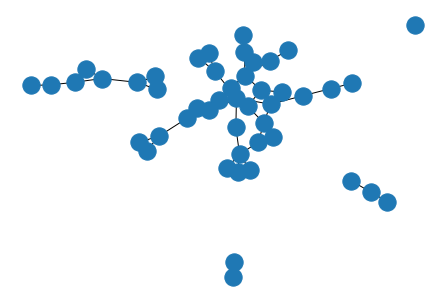

In [82]:
for x in range(1, N+1):
    print("Graph G{0}".format(x), "Nodes: ", G["G{0}".format(x)].number_of_nodes()," Edges: ", G["G{0}".format(x)].number_of_edges())
    nx.draw(G["G{0}".format(x)])
    plt.show()

In [20]:
def graph(t):  # Creates a graph
    g = nx.DiGraph()
    with open('sx-stackoverflow.txt') as f:
        for j in range(N_RL):
            line = f.readline().split(' ')
            line[2] = int(line[2].replace('\n', ''))
            if qN[t][0] <= line[2] < qN[t][1] or (t == N - 1 and qN[t][0] <= line[2] <= qN[t][1]) \
                    and line[0] != line[1]:
                g.add_edge(line[0], line[1])
    nx.draw_networkx(g, node_size=150, font_size=10)
    plt.show()


In [22]:
tN = []
qN = []
for j in range(N + 1):
    tN.append(int(t_min + j * dt))
print(tN)
for j in range(len(tN) - 1):
    qN.append([tN[j], tN[j + 1]])
print(qN)

[1217567877, 1217627024, 1217686172, 1217745319, 1217804467, 1217863615]
[[1217567877, 1217627024], [1217627024, 1217686172], [1217686172, 1217745319], [1217745319, 1217804467], [1217804467, 1217863615]]


In [80]:
def centrality_plots(G):
    
    # Compute the degree centrality: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the in degree centrality: in_deg_cent
#     in_deg_cent = nx.in_degree_centrality(G)
    # Compute the Out-Degree Centrality: out_deg_cent
#     out_deg_cent = nx.out_degree_centrality(G)
    # Compute the closeness Centrality: clo_cent
    clo_cent = nx.closeness_centrality(G)
    # Compute the Betweenness Centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    # Compute the Eigenvector Centrality: eig_cent
    eig_cent = nx.eigenvector_centrality_numpy(G)
    # Compute the Katz Centrality: katz_cent
    L = nx.normalized_laplacian_matrix(G)
    e = numpy.linalg.eigvals(L.A)
    katz_cent = nx.katz_centrality_numpy(G, max(e).real)
    
    # degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

    # Plots 
    fig, axs = plt.subplots(3, 2, figsize=(15,15))

    # Plot a histogram of the degree centrality distribution of the graph.
    deg_cent_values = np.asarray(list(deg_cent.values())) 
    axs[0][0].set_ylabel('Relative Frequency')
    axs[0][0].set_title('degree centrality')
    axs[0][0].hist(deg_cent_values, weights = np.zeros_like(deg_cent_values) + 1. / deg_cent_values.size)
    
    # Plot a histogram of the closeness Centrality distribution of the graph
    clo_cent_values = np.asarray(list(clo_cent.values())) 
    axs[0][1].set_title('Closeness Centrality')
    axs[0][1].hist(clo_cent_values, weights = np.zeros_like(clo_cent_values) + 1. / clo_cent_values.size)

    # Plot a histogram of the Betweenness Centrality distribution of the graph
    bet_cent_values = np.asarray(list(bet_cent.values())) 
    axs[1][0].set_title('Betweenness Centrality')
    axs[1][0].hist(bet_cent_values, weights = np.zeros_like(bet_cent_values) + 1. / clo_cent_values.size)

    # Plot a histogram of the Eigenvector Centrality distribution of the graph
    eig_cent_value = np.asarray(list(eig_cent.values())) 
    axs[1][1].set_title('Eigenvector Centrality')
    axs[1][1].hist(eig_cent_value, weights = np.zeros_like(eig_cent_value) + 1. / clo_cent_values.size)

    # Plot a histogram of the Katz Centrality distribution of the graph
    katz_cent_value = np.asarray(list(katz_cent.values())) 
    axs[2][0].set_title('Katz Centrality')
    axs[2][0].set_xlabel('Normalized Centrality Measure Values')
    axs[2][0].hist(katz_cent_value, weights = np.zeros_like(katz_cent_value) + 1. / katz_cent_value.size)


    print("Graph G{0}".format(x))
    plt.show()

Graph G1


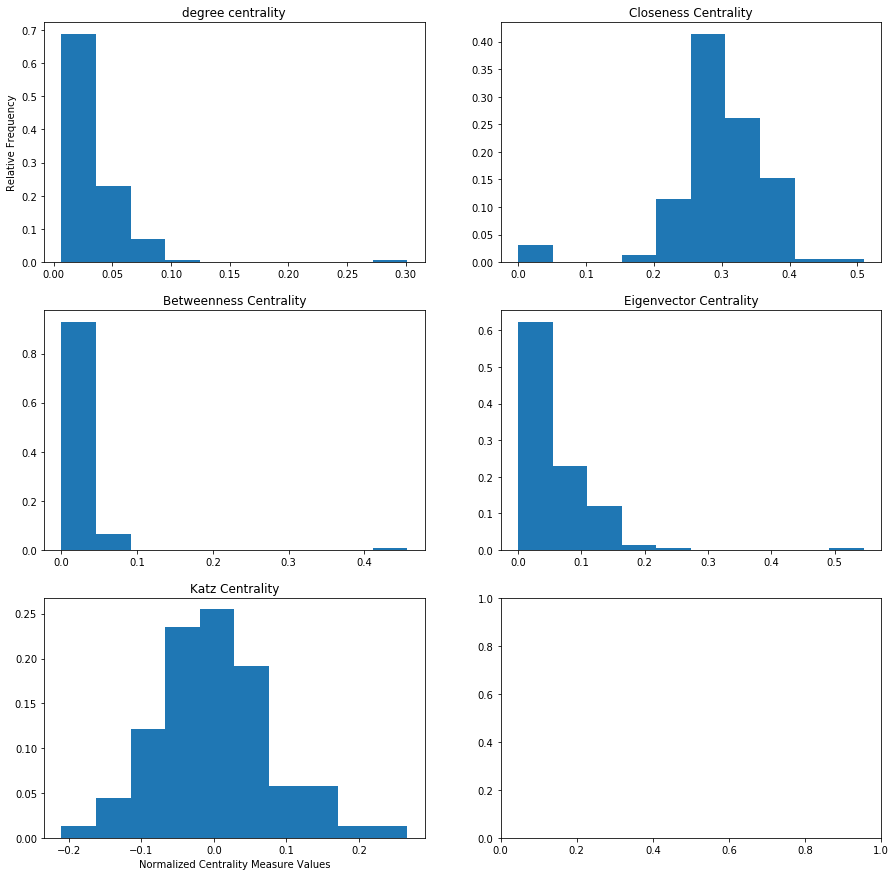

Graph G2


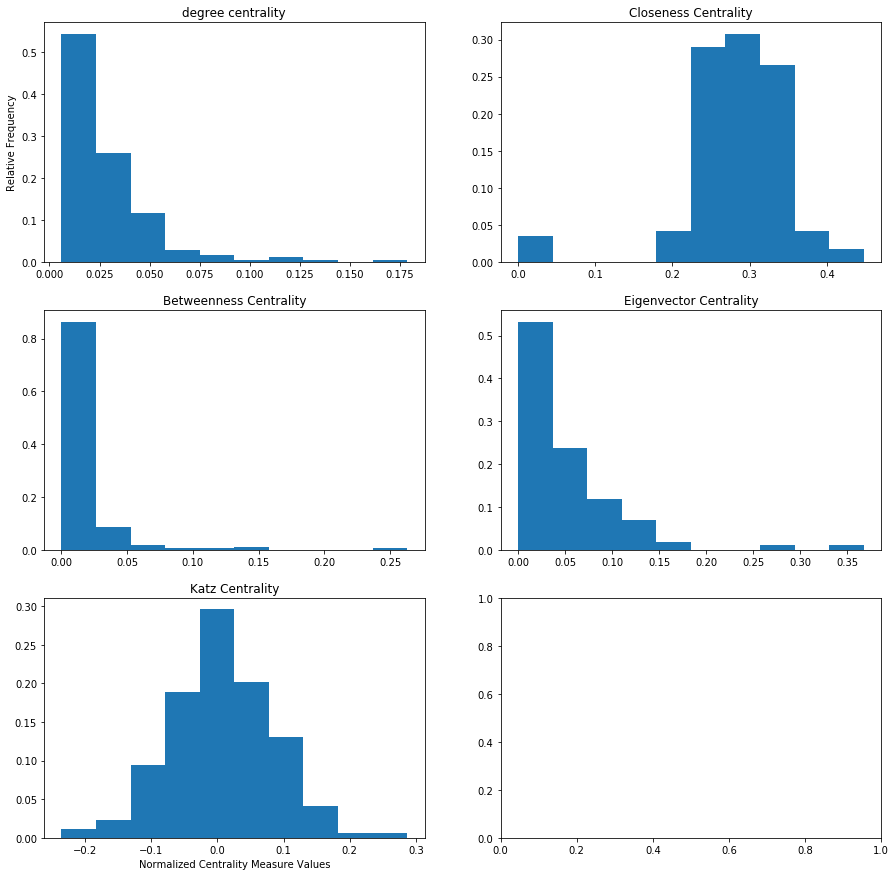

Graph G3


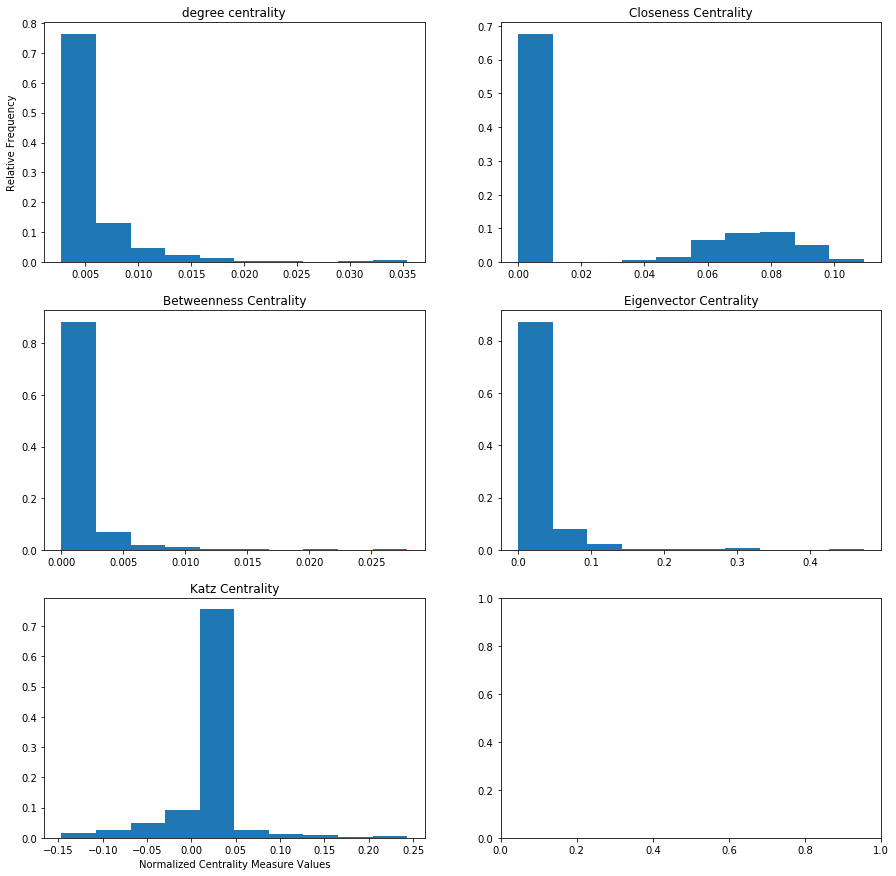

Graph G4


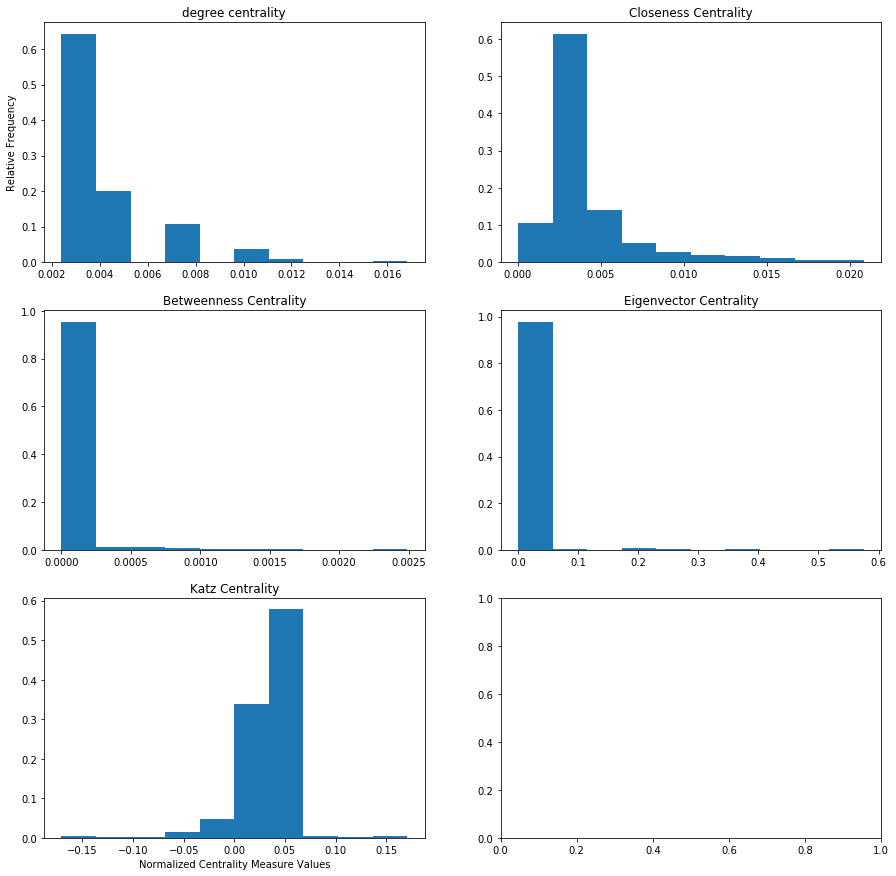

Graph G5


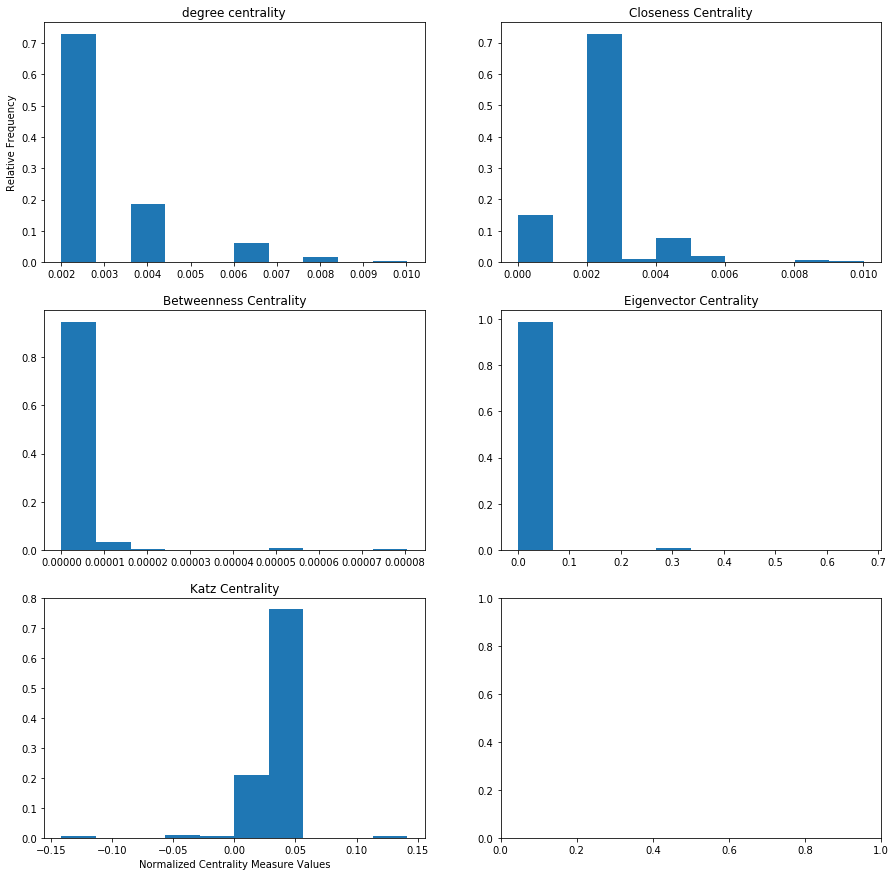

In [81]:
for x in range(1, N+1):
    centrality_plots(G["G{0}".format(x)])

In [71]:
t0 = t_min
t1 = t0+dt
T = nx.DiGraph()

while N > 0:
    for e in E:
        a=e[0]; b=e[1]
        ts=int(G[a][b]['timestamp'])
        if (ts >= t0) and (ts < t1):
            T.add_edge(a,b)
    N -= 1
nx.draw(T) 

KeyError: 9